# Description: This task involves performing exploratory data analysis on a dataset.

# Responsibility: Create visualizations to understand the distribution of variables, identify outliers, and check for correlations between variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("USvideos.csv")
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [3]:
df.shape

(40949, 16)

In [4]:
df = df.drop_duplicates()
df.shape

(40901, 16)

In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [7]:
remove_column = ['thumbnail_link','description']
df = df.drop(columns=remove_column)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [8]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


In [9]:
import datetime

In [10]:
df['trending_date'] = df['trending_date'].apply(lambda x: datetime.datetime.strptime(x,'%y.%d.%m'))
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False


In [11]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False


In [12]:
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_year,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,2017,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,2017,11,13,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2017,11,12,19


In [13]:
print(sorted(df['category_id'].unique()))
[1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,30,43]

[np.int64(1), np.int64(2), np.int64(10), np.int64(15), np.int64(17), np.int64(19), np.int64(20), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(43)]


[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43]

In [14]:
df['category_name'] = np.nan
df.loc[(df['category_id'] == 1), 'category_name'] = 'Film Animation'
df.loc[(df['category_id'] == 2), 'category_name'] = 'Autos and Vehicles'
df.loc[(df['category_id'] == 10), 'category_name'] = 'Music'
df.loc[(df['category_id'] == 15), 'category_name'] = 'Pets and animals'
df.loc[(df['category_id'] == 17), 'category_name'] = 'Sports'
df.loc[(df['category_id'] == 19), 'category_name'] = 'Travel and Events'
df.loc[(df['category_id'] == 20), 'category_name'] = 'Gaming'
df.loc[(df['category_id'] == 22), 'category_name'] = 'People and Blog'
df.loc[(df['category_id'] == 23), 'category_name'] = 'Comedy'
df.loc[(df['category_id'] == 24), 'category_name'] = 'Entertainment'
df.loc[(df['category_id'] == 25), 'category_name'] = 'News and Politics'
df.loc[(df['category_id'] == 26), 'category_name'] = 'How to and style'
df.loc[(df['category_id'] == 27), 'category_name'] = 'Education'
df.loc[(df['category_id'] == 28), 'category_name'] = 'Science and Technology'
df.loc[(df['category_id'] == 29), 'category_name'] = 'Non Profits and Activism'
df.loc[(df['category_id'] == 30), 'category_name'] = 'Movies'
df.loc[(df['category_id'] == 43), 'category_name'] = 'Shows'

C:\Users\jhaha\AppData\Local\Temp\ipykernel_11256\2402830078.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Film Animation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['category_id'] == 1), 'category_name'] = 'Film Animation'


In [15]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_year,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,2017,11,13,17,People and Blog
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,2017,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2017,11,12,19,Comedy


# Data Visualization

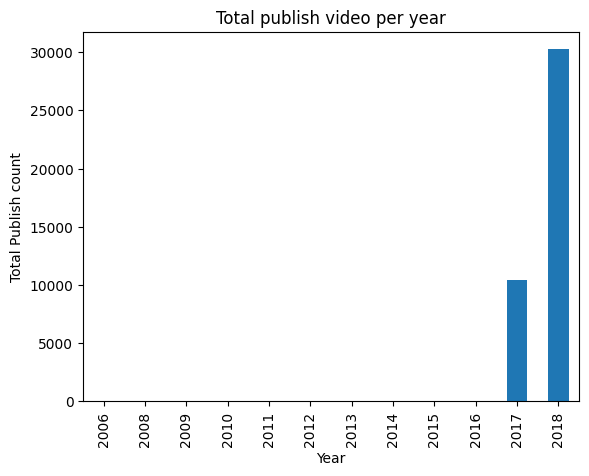

In [16]:
yearly_counts = df.groupby('publish_year')['video_id'].count()

# Creating a bar chart.
yearly_counts.plot(kind = 'bar', xlabel = "Year", ylabel = "Total Publish count", title = "Total publish video per year")

# Show the chart
plt.show()

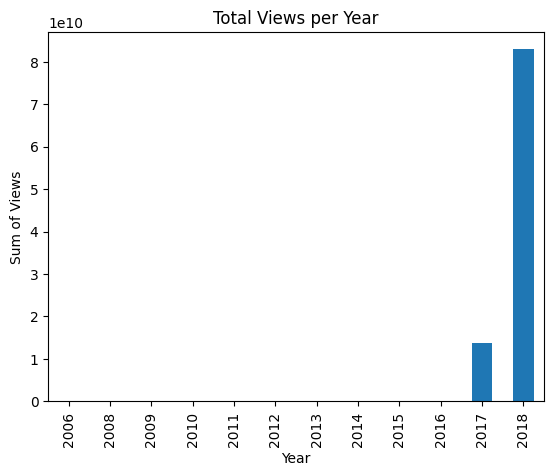

In [17]:
# Group by year and sum of views for each year.
Total_views = df.groupby('publish_year')['views'].sum()

# Create a bar chart.
Total_views.plot(kind = 'bar', xlabel = "Year", ylabel = "Sum of Views", title = "Total Views per Year")

# Show the chart.
plt.show()

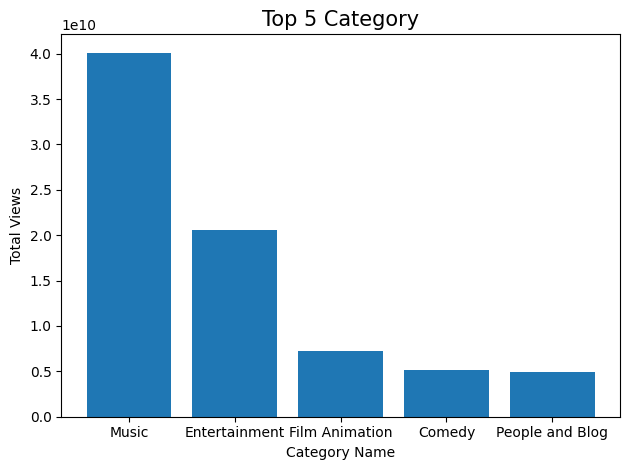

In [18]:
category_views = df.groupby('category_name')['views'].sum().reset_index()

top_categories = category_views.sort_values(by='views', ascending = False).head(5)

plt.bar(top_categories['category_name'], top_categories['views'])

plt.xlabel('Category Name')
plt.ylabel('Total Views')
plt.title('Top 5 Category',fontsize = 15)
plt.tight_layout()
plt.show()

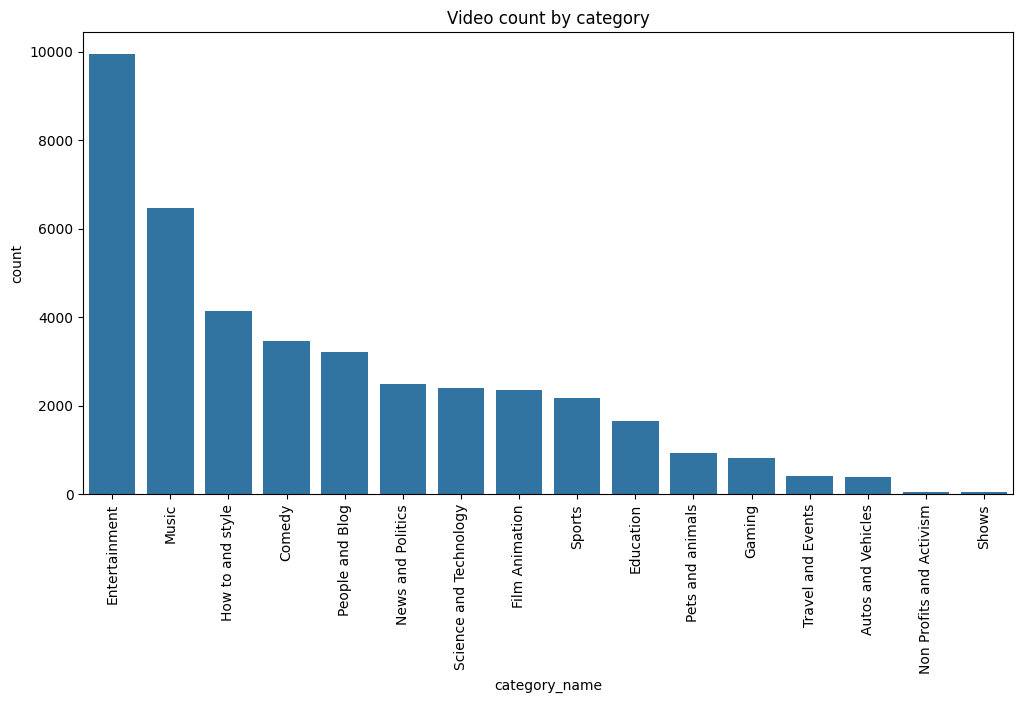

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'category_name', data=df, order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Video count by category')
plt.show()

C:\Users\jhaha\AppData\Local\Temp\ipykernel_11256\3946799656.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = videos_per_hour.index, y=videos_per_hour.values, palette = 'rocket')


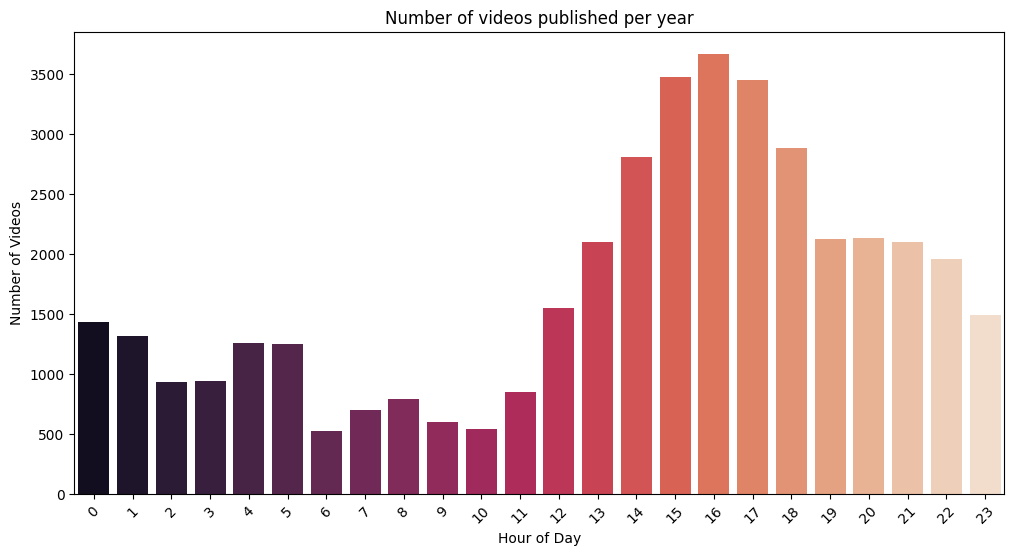

In [20]:
# Count number of videos publish per hour.

videos_per_hour = df['publish_hour'].value_counts().sort_index()

# Create a bar chart.
plt.figure(figsize=(12,6))
sns.barplot(x = videos_per_hour.index, y=videos_per_hour.values, palette = 'rocket')

plt.title("Number of videos published per year")

plt.xlabel("Hour of Day")

plt.ylabel("Number of Videos")

plt.xticks(rotation=45)

plt.show()

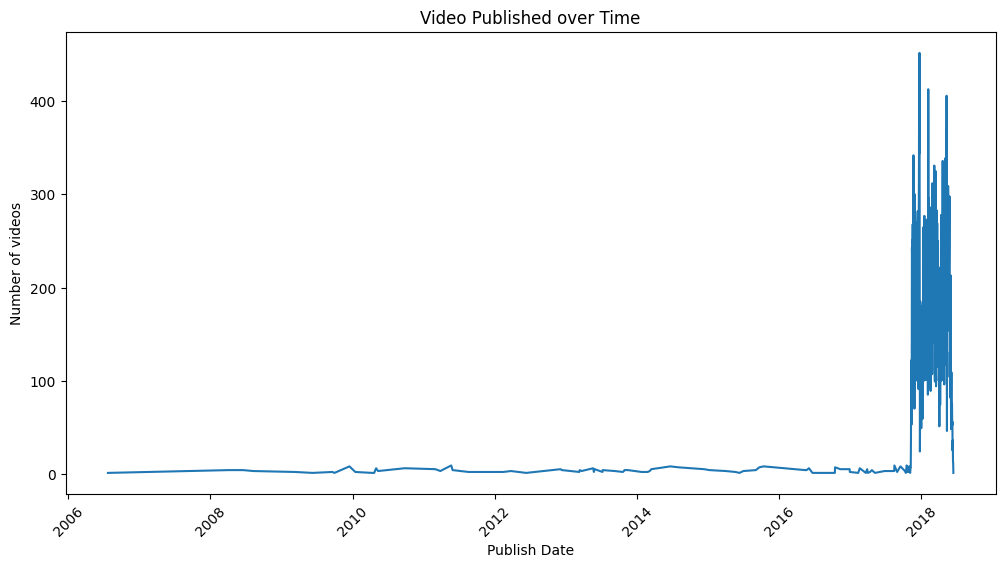

In [21]:
df['publish_date'] = df['publish_time'].dt.date

video_count_by_date = df.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.title("Video Published over Time")
plt.xlabel("Publish Date")
plt.ylabel("Number of videos")

plt.xticks(rotation = 45)
plt.show()

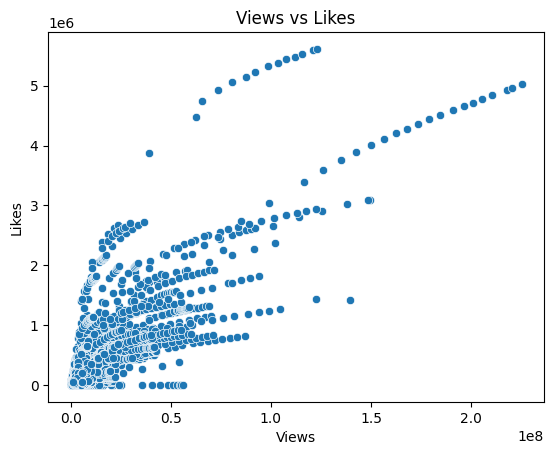

In [22]:
# Scatter plot between views and Likes

sns.scatterplot(data=df,x='views',y='likes')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')

plt.show()

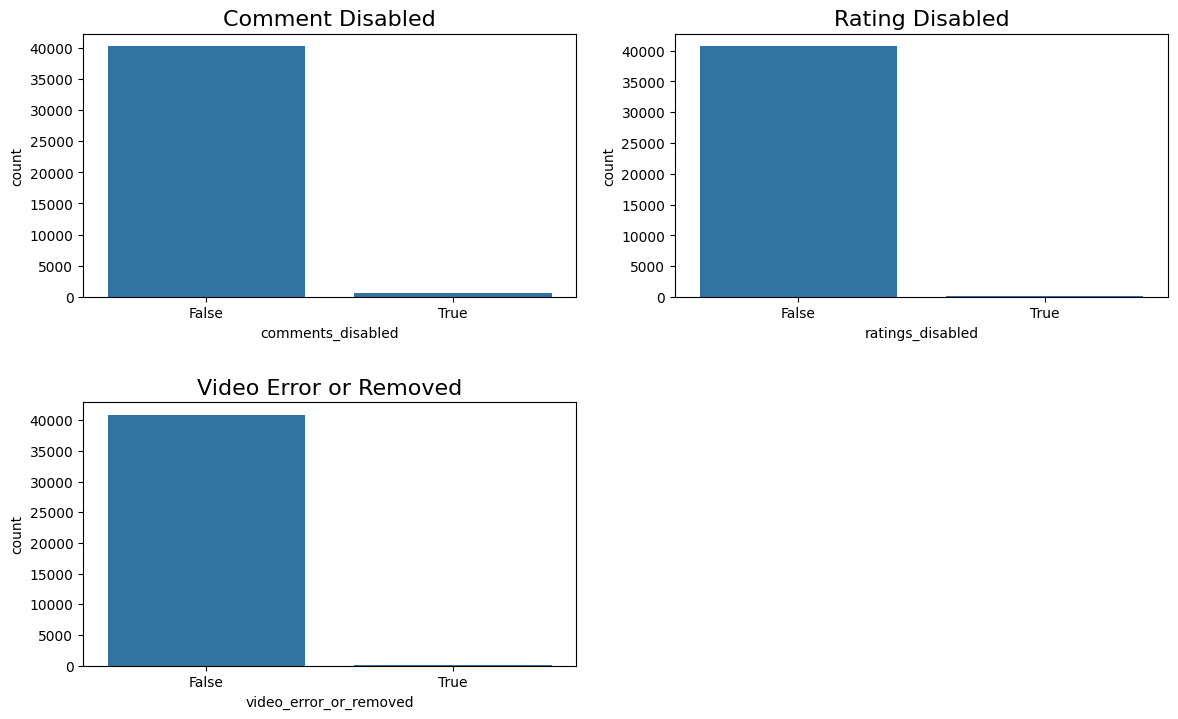

In [23]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.subplot(2,2,1)

c = sns.countplot(x='comments_disabled',data=df)
c.set_title("Comment Disabled",fontsize=16)
plt.subplot(2,2,2)

r = sns.countplot(x='ratings_disabled',data=df)
r.set_title("Rating Disabled",fontsize=16)
plt.subplot(2,2,3)

v = sns.countplot(x='video_error_or_removed',data=df)
v.set_title("Video Error or Removed",fontsize=16)
plt.show()

In [24]:
corr_matrix = df['views'].corr(df['likes'])
print(corr_matrix)

0.8491785476230503
